<a href="https://colab.research.google.com/github/5x12/ml4everyone/blob/master/Chapter%201.%20Basic%20Principles/cost_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COST FUNCTION

This Jupyter Notebook is a supplement for Chapter 1. Basic Principles of the [Machine Learning For Everyone](ml4everyonebook.com) book.

# 1. Data & Basic Libraries

Let's import basic libraries and the data we have in Section 1.4: **Algorithms and How They Work**.

In [0]:
# Basic libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Defined data

x = np.array([30, 46, 60, 65, 77, 95])
y = np.array([31, 30, 80, 49, 70, 118]) #in 100.000

# 2. Building a Regression Model 

Let's now build a simple regression with our data and then visualize it with the graph.

## 2.1. Build & Plot

Building the regression model first:

In [0]:
from sklearn.linear_model import LinearRegression #import Linear Regression model from scikit-learn library

reg = LinearRegression() #define the model

x=x.reshape((-1, 1)) #reshape x
reg = LinearRegression().fit(x, y) #train your model with x-values

Checking estimated coefficient and intercept:

In [6]:
print(' coefficient (parameter a) = {} \n intercept (parameter b) = {}'.format(reg.coef_[0].round(1), reg.intercept_.round(0)))

 coefficient (parameter a) = 1.3 
 intercept (parameter b) = -18.0


Plotting the regression model:

(0.0, 110.0)

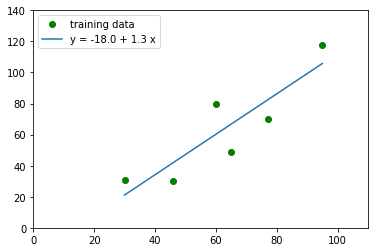

In [9]:
fig, ax = plt.subplots() #define the graph
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, reg.intercept_ + reg.coef_[0]*x, label='y = {} + {} x'.format(reg.intercept_.round(0), reg.coef_[0].round(2))) 
plt.legend(); #show legend
plt.ylim(0, 140) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## 2.2. Drawing Residuals

Let's draw residuals - the difference between data points and the model predictions. 

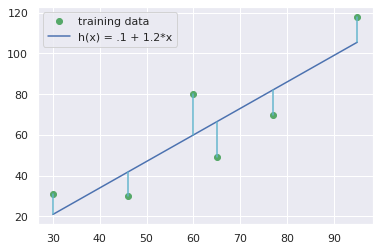

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18.0  + 1.3*x, label='h(x) = .1 + 1.2*x')
for i in range(len(x)):
    ax.plot([x[i], x[i]], [-18.0  + 1.3*x[i],y[i]], '-', color='c')
plt.legend();

## 2.3. Calculating Sum of Squared Residuals (SSR)

Let's calculate SSR. The formula for calculating SSR is:
  $$SSR = \sum (y_i-\hat{y}_i)^2$$
  where
  - $y_i$ is a value of an observed target variable $i$
  - $\hat{y}_i$ is a value of $y$ predicted by the model with a specific $x_i$ ($\hat{y}_i=ax_i+b$)


In [29]:
# Defining lists

y_pred = [] #defined list with predicted values of y
r = [] #defined list with residuals

#Calculating predicted values of y

for i in x:
    y_pred.append(-18 + 1.3*i)
    
#Calculating residuals
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

#Summing up the residuals

np.sum(r)

1248.1500000000003

# 3. Building Regressions with Wrong Parameters

Let's now build several regressions with random values for coefficient ($a$) and intercept ($b$), and see how their SSR would differ from the "true" regression $y=1.3x -18$ (estimated in Section 2.1.)

## 3.1. Regression 1

Let's plot regression $y=-10x+780$ and calculate its SSR.

(0.0, 110.0)

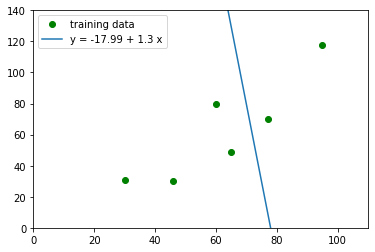

In [21]:
#Plotting Regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 780 + -10*x, label='y = {} + {} x'.format(reg.intercept_.round(2), reg.coef_[0].round(2)))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [28]:
# Calculating SSR

y_pred = []
r = []
for i in x:
    y_pred.append(780 + -10*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

388806

For the Regression 1, $SSR=388,806$. 

Let's proceed with another regression, Regression 2, and execute the same tasks!

## 3.2. Regression 2

(0.0, 110.0)

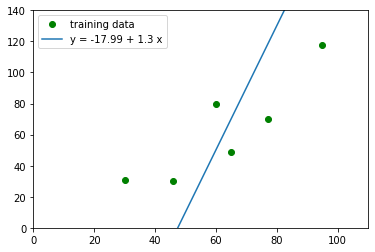

In [23]:
#Plotting Regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 4*x-190, label='y = {} + {} x'.format(reg.intercept_.round(2), reg.coef_[0].round(2)))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [27]:
# Calculating SSR

y_pred = []
r = []
for i in x:
    y_pred.append(-190 + 4*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

20326

For the Regression 2, $SSR=20,326$.

If you compare Regression 1 and Regression 2, you might notice that, as the line follows the data points, it shrinks the residuals, and lowers the Sum of Squared Residuals.

# 4. Cost Function

Now is exciting stuff - plotting a Cost Function!

## 4.1. Trying out several values for coefficient

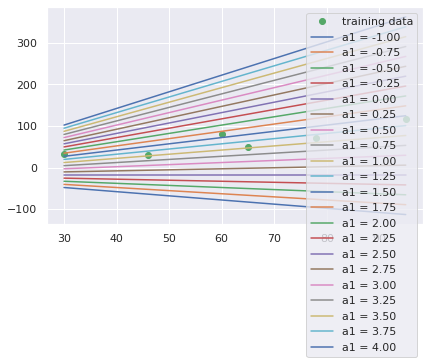

In [0]:
#Plotting Regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
a1 = np.linspace(-1,4,21) #define coefficient range: between -1 and 4
for i in range(len(a1)):
    ax.plot(x, -18 + a1[i]*x, label='a1 = %.2f' %a1[i] )

plt.legend();

## 4.2. Building Cost Function


In [0]:
# Defined Cost Function J

def J(a0, a1, x, y, m):
    J = 0
    for i in range(m):
        J += ((a0 + a1*x[i]) - y[i] )**2
    return J

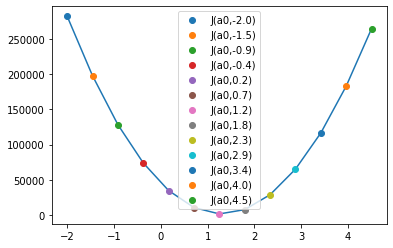

In [32]:
# Plotting 2-D Cost Function for coefficient

fig, ax = plt.subplots()
a = np.linspace(-2,4.5,13) ## 
a1 = np.linspace(-2,4.5,13) 

ax.plot(a, J(-18,a,x,y,m=len(x)), c='C0')
for i in range(len(a1)):
    ax.plot(a1[i], J(-18,a1[i],x,y,m=len(x)), 'o', label='J(a0,%.1f)' %a1[i])
plt.legend();

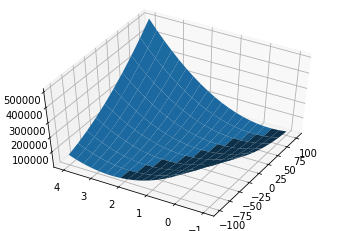

In [37]:
# Plotting Cost Function for coefficient and intercept 

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a0 = np.linspace(-100,100,10)
a1 = np.linspace(-1,4,20)
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))
ax.view_init(50,-150)

# 5. Gradient Descent 

## 5.1. Original Regression

(0.0, 110.0)

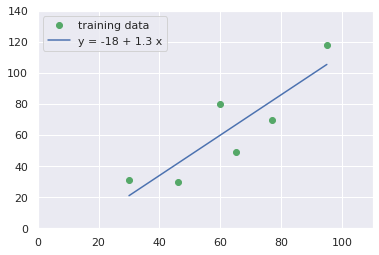

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18 + 1.3*x, label='y = {} + {} x'.format(-18, 1.3))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [39]:
# Calculating SSR:

y_pred = []
r = []
for i in x:
    y_pred.append(-18 + 1.3*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

1248.1500000000003

## 5.2. Gradient Steps

We know that our cost function $J(a)$ is

$
\begin{equation}
\begin{split}
    J(a) &= \sum\Big(y_i - (ax_i-18)\Big)^2 \\
    &= \Big(31-(a*30-18)\Big)^2+\Big(30-(a*46-18)\Big)^2+\Big(80-(a*60-18)\Big)^2+\\
    &+\Big(49-(a*65-18)\Big)^2+\Big(70-(a*77-18)\Big)^2+\Big(118-(a*95-18)\Big)^2
\end{split}
\end{equation}
$

Let's take the derivative of this function with the respect to parameter $a$:

\begin{equation}
\begin{split}
    \underbrace{\frac{\partial}{\partial \ a} \ J(a)}_\text{slope} &=\underbrace{\frac{\partial}{\partial \ a}\Big(31-(a*30-18)\Big)^2}_\text{2*(31-(a*30-18))*(-1)}+\frac{\partial}{\partial \ a}\Big(30-(a*46-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(80-(a*60-18)\Big)^2+\\
    &+\frac{\partial}{\partial \ a}\Big(49-(a*65-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(70-(a*77-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(118-(a*95-18)\Big)^2
\end{split}
\end{equation}

Using a chain rule for each term, we will get this equation: 

\begin{equation}
\begin{split}
    \frac{\partial}{\partial \ a} \ J(a) &=(-2)\Big(31-(a*30-18)\Big)+(-2)\Big(30-(a*46-18)\Big)+(-2)\Big(80-(a*60-18)\Big)+\\
    &+(-2)\Big(49-(a*65-18)\Big)+(-2)\Big(70-(a*77-18)\Big)+(-2)\Big(118-(a*95-18)\Big)
\end{split}
\end{equation}




Now that we have the derivative, gradient descent will use it to find where the Sum of Squared Residuals is the lowest. Our algorithm does not know the true value of $a$ that would minimize $J(a)$ (which is $a=1.3$). Hence, it will start by setting $a=0$. 

In [0]:
# Define parameters

b=-18 #intercept is known and equal to -18
a = 0 #coefficient is not known and randomly assigned to be 0
l=0.001 #learning rate is defined to be 0.001

### 5.2.1. Step 1

First step is to plug $a=0$ into the derivative:

\begin{equation}
\begin{split}
    \frac{\partial}{\partial \ a} \ J(a) &=(-2)\Big(31-(0*30-18)\Big)+(-2)\Big(30-(0*46-18)\Big)+(-2)\Big(80-(0*60-18)\Big)+\\
    &+(-2)\Big(49-(0*65-18)\Big)+(-2)\Big(70-(0*77-18)\Big)+(-2)\Big(118-(0*95-18)\Big) \\ = -972
\end{split}
\end{equation}


In [87]:
# Calculating a derivative

d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-972]


Thus, when $a=0$, the slope of the curve = -972. 

Gradient descent use step size to get to the minimum point. The closer we get to the optimal value for the $a$, the smaller the step sizes. Gradient descent determines the **Step Size** by multiplying the slope $a$ by a small number called the learning rate $l$. 

For now, let's take $l=0.001$ and calculate the Step Size:

\begin{equation}
    \begin{split}
        Step \ Size &= J(a) * l \\
        &=(-972)*0.001 \\
        &=-0.972
    \end{split}
\end{equation}

In [88]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.972]


And then we update $a$: 
\begin{equation}
    \begin{split}
        a_{new} &= a - Step \ Size \\
        &=0-(-0.972)=0.972
    \end{split}
\end{equation}


In [89]:
a = a-step_size
print('At Step 1, a = ', a)

At Step 1, a =  [0.972]


### 5.2.2. Step 2

Following the same logic, we now use the new coefficient $a$ to calculate new  derivative:

In [90]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-246.888]


In [91]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.246888]


In [92]:
a = a-step_size
print('At Step 2, a = ', a)

At Step 2, a =  [1.218888]


### 5.2.3. Step 3

In [93]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-62.709552]


In [94]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.06270955]


In [95]:
a = a-step_size
print('At Step 3, a = ', a)

At Step 3, a =  [1.28159755]


### 5.2.4. Step 4

In [96]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-15.92822621]


In [97]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.01592823]


In [98]:
a = a-step_size
print('At Step 4, a = ', a)

At Step 4, a =  [1.29752578]


### 5.2.5. Step 5

In [99]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-4.04576946]


In [100]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.00404577]


In [101]:
a = a-step_size
print('At Step 5, a = ', a)

At Step 5, a =  [1.30157155]


### 5.2.6. Step 6

In [102]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-1.02762544]


In [103]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.00102763]


In [104]:
a = a-step_size
print('At Step 6, a = ', a)

At Step 6, a =  [1.30259917]


### 5.2.7. Step 7

In [105]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-0.26101686]


In [106]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-0.00026102]


In [107]:
a = a-step_size
print('At Step 7, a = ', a)

At Step 7, a =  [1.30286019]


### 5.2.8. Step 8

In [108]:
d=(-2)*(y[0]-(a*x[0]+b))+(-2)*(y[1]-(a*x[1]+b))+(-2)*(y[2]-(a*x[2]+b))+(-2)*(y[3]-(a*x[3]+b))+(-2)*(y[4]-(a*x[4]+b))+(-2)*(y[5]-(a*x[5]+b))
print('Derivative = ', d)

Derivative =  [-0.06629828]


In [109]:
step_size = d*l
print('Step Size = ', step_size)

Step Size =  [-6.6298283e-05]


In [110]:
a = a-step_size
print('At Step 8, a = ', a)

At Step 8, a =  [1.30292649]
